In [1]:
from PIL import Image
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge,Lasso,RidgeCV,LassoCV,ElasticNet,ElasticNetCV,LinearRegression
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
import seaborn as sns 
import plotly.express as px
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

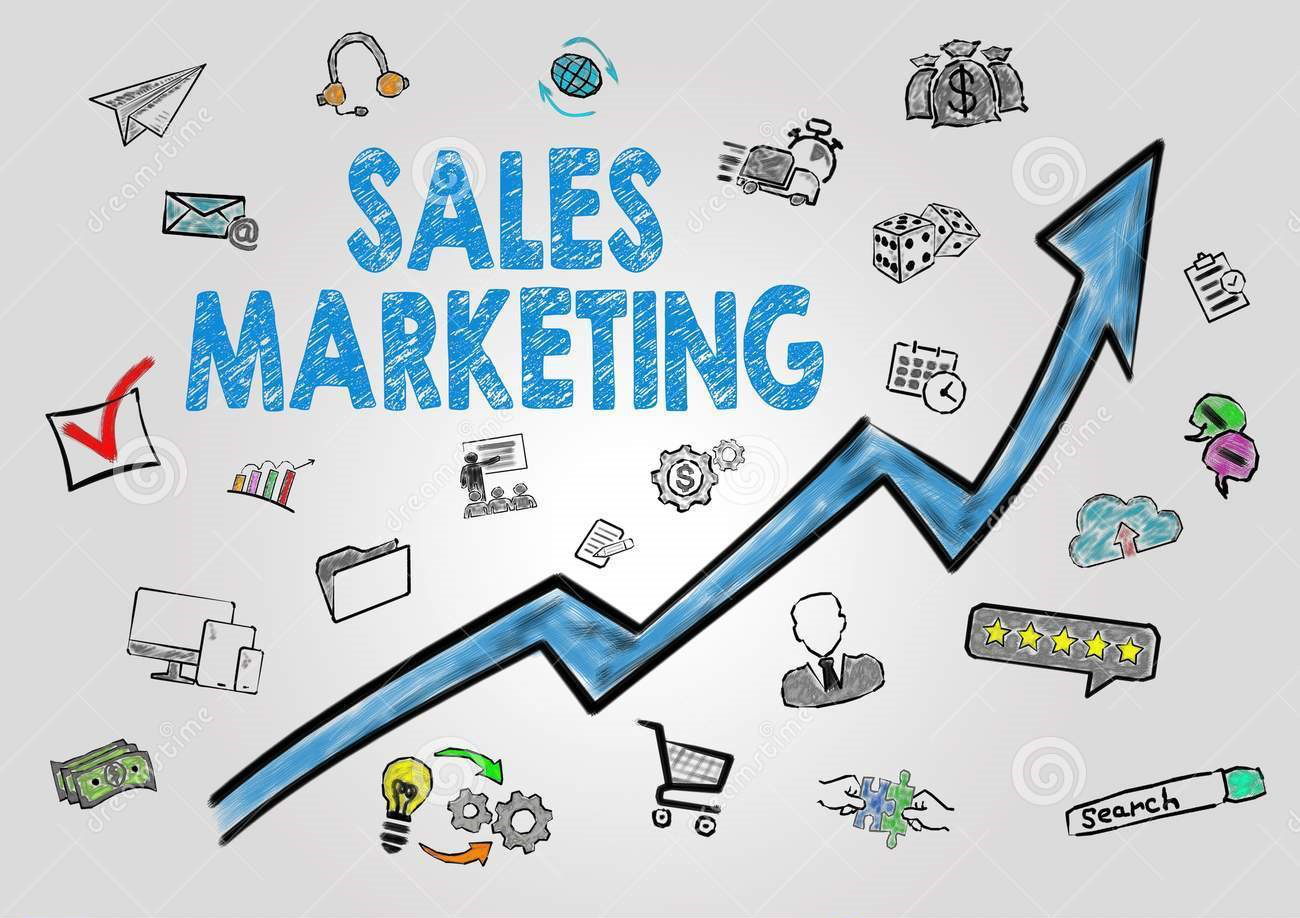

In [2]:
Image.open("marketing.jpg")

In [3]:
df=pd.read_csv('Advertising_Data.csv')
df

TV  Radio  Newspaper  Sales
0    230.1   37.8       69.2   22.1
1     44.5   39.3       45.1   10.4
2     17.2   45.9       69.3    9.3
3    151.5   41.3       58.5   18.5
4    180.8   10.8       58.4   12.9
..     ...    ...        ...    ...
195   38.2    3.7       13.8    7.6
196   94.2    4.9        8.1    9.7
197  177.0    9.3        6.4   12.8
198  283.6   42.0       66.2   25.5
199  232.1    8.6        8.7   13.4

[200 rows x 4 columns]

In [4]:
df.head()

TV  Radio  Newspaper  Sales
0  230.1   37.8       69.2   22.1
1   44.5   39.3       45.1   10.4
2   17.2   45.9       69.3    9.3
3  151.5   41.3       58.5   18.5
4  180.8   10.8       58.4   12.9

In [5]:
df.tail()

TV  Radio  Newspaper  Sales
195   38.2    3.7       13.8    7.6
196   94.2    4.9        8.1    9.7
197  177.0    9.3        6.4   12.8
198  283.6   42.0       66.2   25.5
199  232.1    8.6        8.7   13.4

In [6]:
df.describe()

TV       Radio   Newspaper       Sales
count  200.000000  200.000000  200.000000  200.000000
mean   147.042500   23.264000   30.554000   14.022500
std     85.854236   14.846809   21.778621    5.217457
min      0.700000    0.000000    0.300000    1.600000
25%     74.375000    9.975000   12.750000   10.375000
50%    149.750000   22.900000   25.750000   12.900000
75%    218.825000   36.525000   45.100000   17.400000
max    296.400000   49.600000  114.000000   27.000000

In [7]:
df.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

In [8]:
fig=px.scatter(df,x='TV',y='Sales')
fig.show()

In [9]:
fig1=px.scatter(df,x='Radio',y='Sales')
fig1.show()

In [10]:
fig2=px.scatter(df,x='Newspaper',y='Sales')
fig2.show()

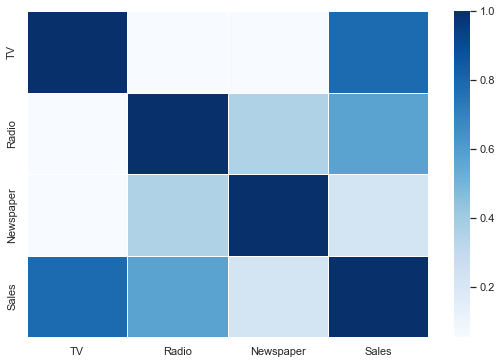

In [11]:
sns.set()
fig, ax = plt.subplots(figsize=(9, 6))
sns.heatmap(df.corr(), linewidths=.5, ax=ax, cmap='Blues')
plt.show()

In [12]:
lm3=smf.ols(formula='Sales ~ TV+Radio+Newspaper',data=df).fit()
lm3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     570.3
Date:                Sat, 16 Jul 2022   Prob (F-statistic):           1.58e-96
Time:                        22:29:28   Log-Likelihood:                -386.18
No. Observations:                 200   AIC:                             780.4
Df Residuals:                     196   BIC:                             793.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.9389      0.312      9.422      0.000       2.324       3.554
TV             0.0458      0.001     32.809      0.000       0.043       0.049
Radio          0.1885      0.009     21.893      0.000       0.172       0.206
Newspaper     -0.0010      0.006     -0.177      0.860      -0.013       0.011
==============================================================================
Omnibus:                       60.414   Durbin-Watson:                   2.084
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              151.241
Skew:                          -1.327   Prob(JB):                     1.44e-33
Kurtosis:                       6.332   Cond. No.                         454.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [13]:
df

TV  Radio  Newspaper  Sales
0    230.1   37.8       69.2   22.1
1     44.5   39.3       45.1   10.4
2     17.2   45.9       69.3    9.3
3    151.5   41.3       58.5   18.5
4    180.8   10.8       58.4   12.9
..     ...    ...        ...    ...
195   38.2    3.7       13.8    7.6
196   94.2    4.9        8.1    9.7
197  177.0    9.3        6.4   12.8
198  283.6   42.0       66.2   25.5
199  232.1    8.6        8.7   13.4

[200 rows x 4 columns]

In [14]:
x=df[['TV','Radio']]

In [15]:
y=df['Sales']

In [16]:
scaler=StandardScaler()
scaler

StandardScaler()

In [17]:
arr=scaler.fit_transform(x)
arr

array([[ 0.96985227,  0.98152247],
       [-1.19737623,  1.08280781],
       [-1.51615499,  1.52846331],
       [ 0.05204968,  1.21785493],
       [ 0.3941822 , -0.84161366],
       [-1.61540845,  1.73103399],
       [-1.04557682,  0.64390467],
       [-0.31343659, -0.24740632],
       [-1.61657614, -1.42906863],
       [ 0.61604287, -1.39530685],
       [-0.94515567, -1.17923146],
       [ 0.79002835,  0.04969734],
       [-1.4390876 ,  0.79920886],
       [-0.57850171, -1.05768905],
       [ 0.66625345,  0.65065703],
       [ 0.56466461,  1.65000572],
       [-0.92530498,  0.9004942 ],
       [ 1.56887609,  1.10306488],
       [-0.90895735, -0.18663512],
       [ 0.0030068 ,  0.04294498],
       [ 0.8332328 ,  0.29953451],
       [ 1.05509347, -1.22649795],
       [-1.5628625 , -0.4972435 ],
       [ 0.94883389, -0.42971994],
       [-0.98952781, -0.72007125],
       [ 1.35285385, -1.33453565],
       [-0.04837147,  0.40757221],
       [ 1.08662104, -0.44322465],
       [ 1.18820988,

In [18]:
arr.shape

(200, 2)

In [19]:
arr.shape[1]

2

In [20]:
[variance_inflation_factor(arr,i)for i in range(arr.shape[1])]

[1.0030130408441913, 1.0030130408441913]

In [21]:
x.columns

Index(['TV', 'Radio'], dtype='object')

In [22]:
vif_df=pd.DataFrame()

In [23]:
vif_df['vif']=[variance_inflation_factor(arr,i)for i in range(arr.shape[1])]

In [24]:
vif_df

vif
0  1.003013
1  1.003013

In [25]:
vif_df['feature']=x.columns

In [26]:
vif_df

vif feature
0  1.003013      TV
1  1.003013   Radio

In [27]:
arr

array([[ 0.96985227,  0.98152247],
       [-1.19737623,  1.08280781],
       [-1.51615499,  1.52846331],
       [ 0.05204968,  1.21785493],
       [ 0.3941822 , -0.84161366],
       [-1.61540845,  1.73103399],
       [-1.04557682,  0.64390467],
       [-0.31343659, -0.24740632],
       [-1.61657614, -1.42906863],
       [ 0.61604287, -1.39530685],
       [-0.94515567, -1.17923146],
       [ 0.79002835,  0.04969734],
       [-1.4390876 ,  0.79920886],
       [-0.57850171, -1.05768905],
       [ 0.66625345,  0.65065703],
       [ 0.56466461,  1.65000572],
       [-0.92530498,  0.9004942 ],
       [ 1.56887609,  1.10306488],
       [-0.90895735, -0.18663512],
       [ 0.0030068 ,  0.04294498],
       [ 0.8332328 ,  0.29953451],
       [ 1.05509347, -1.22649795],
       [-1.5628625 , -0.4972435 ],
       [ 0.94883389, -0.42971994],
       [-0.98952781, -0.72007125],
       [ 1.35285385, -1.33453565],
       [-0.04837147,  0.40757221],
       [ 1.08662104, -0.44322465],
       [ 1.18820988,

In [28]:
train_test_split(arr,y,test_size=0.25)

[array([[-0.62053847,  1.36640677],
        [ 0.41520058,  1.54872038],
        [ 0.51445404,  0.36705807],
        [ 0.80987904,  1.24486436],
        [ 0.28325186,  1.10981724],
        [ 0.29726411, -0.34869167],
        [ 0.33463012, -0.53100528],
        [-1.39588315, -1.46283041],
        [-0.18615862,  1.31914027],
        [-0.08807285, -1.42906863],
        [-1.19737623,  1.08280781],
        [-0.3986778 , -0.39595816],
        [-0.24921376,  0.92075127],
        [ 1.21273132,  0.89374184],
        [ 0.23070591,  1.26512143],
        [-1.19504085,  0.17123975],
        [-1.2861205 ,  1.03554132],
        [ 1.70316018,  0.34004865],
        [-0.07873135, -1.44257334],
        [-0.43487612, -0.60528119],
        [-1.5628625 , -0.4972435 ],
        [ 1.37971067, -1.37504978],
        [ 0.327624  , -0.051588  ],
        [ 1.60273904, -0.85511837],
        [-1.41806922,  1.06255074],
        [ 0.91964169, -1.01717491],
        [-0.51778195,  0.42782928],
        [ 0.64757044, -0.065

In [29]:
x_train,x_test,y_train,y_test=train_test_split(arr,y,test_size=0.25)

In [30]:
x_train

array([[ 0.34981006, -0.942899  ],
       [-0.46290062, -0.62553826],
       [ 0.81454979,  1.39341619],
       [-0.92530498,  0.9004942 ],
       [-1.21489154,  0.1779921 ],
       [ 1.33417085,  1.31238792],
       [-0.91829885,  1.43393033],
       [ 0.67676264,  1.47444446],
       [-0.84473452,  1.76479577],
       [ 1.08662104, -0.44322465],
       [-0.66140754, -1.55061104],
       [ 0.85541887,  1.73778635],
       [ 1.66579418,  1.28537849],
       [ 0.18983684,  0.5628764 ],
       [ 0.19217221,  0.91399891],
       [ 1.12281936,  1.73778635],
       [ 1.07727954, -0.52425292],
       [ 0.8332328 ,  0.29953451],
       [ 0.4420574 ,  1.39341619],
       [-0.94515567, -1.17923146],
       [ 1.38438142, -0.2203969 ],
       [ 0.47592034, -0.14612098],
       [-0.61703541, -1.24000266],
       [-0.43487612,  1.65675807],
       [ 0.79820216,  0.02268792],
       [-0.90895735, -0.18663512],
       [ 0.84958043,  0.69117116],
       [ 1.26527727,  0.24551567],
       [ 1.55486384,

In [31]:
lr=LinearRegression()

In [32]:
lr.fit(x_train,y_train)

LinearRegression()

In [33]:
lr.coef_

array([3.88198743, 2.75554833])

In [34]:
lr.intercept_

14.107867461614598

In [35]:
df


TV  Radio  Newspaper  Sales
0    230.1   37.8       69.2   22.1
1     44.5   39.3       45.1   10.4
2     17.2   45.9       69.3    9.3
3    151.5   41.3       58.5   18.5
4    180.8   10.8       58.4   12.9
..     ...    ...        ...    ...
195   38.2    3.7       13.8    7.6
196   94.2    4.9        8.1    9.7
197  177.0    9.3        6.4   12.8
198  283.6   42.0       66.2   25.5
199  232.1    8.6        8.7   13.4

[200 rows x 4 columns]

In [36]:
scaler.transform([[230.1,37.8]])

C:\Users\mehul\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names



array([[0.96985227, 0.98152247]])

In [37]:
lr.predict([[0.96985227, 0.98152247]])

array([20.57745439])

In [38]:
scaler.transform([[232.1,8.6]])

C:\Users\mehul\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names



array([[ 0.99320602, -0.99016549]])

In [39]:
lr.predict([[0.99320602, -0.99016549]])

array([15.23503189])

In [40]:
lr.score(x_test,y_test)

0.883953900927207

In [41]:
def adj_r2(x,y):
    r2=lr.score(x,y)
    n=x.shape[0]
    p=x.shape[1]
    adjusted_r2=1-(1-r2)*(n-1)/(n-p-1)
    return adjusted_r2

In [42]:
adj_r2(x_test,y_test)

0.879015769051769

In [43]:
lassocv=LassoCV(alphas=None,cv=10,max_iter=2000000,normalize=True)

In [44]:
lassocv.fit(x_train,y_train)

LassoCV(cv=10, max_iter=2000000, normalize=True)

In [45]:
lassocv.alpha_

0.0009337390260384492

In [46]:
lasso=Lasso(alpha=lassocv.alpha_)

In [47]:
lasso.fit(x_train,y_train)

Lasso(alpha=0.0009337390260384492)

In [48]:
lasso.score(x_test,y_test)

0.8839361340377612

In [49]:
ridgecv=RidgeCV(alphas=np.random.uniform(0,10,50),cv=10,normalize=True)

In [50]:
ridgecv.fit(x_train,y_train)

RidgeCV(alphas=array([4.07843003, 3.28092725, 1.54471486, 9.80226132, 6.44158796,
       6.90295238, 0.89048912, 3.16512637, 8.19767876, 5.72043442,
       4.63539998, 4.18862819, 6.86974712, 1.29073205, 3.9329881 ,
       7.47734988, 9.7434657 , 9.94824631, 8.75416457, 6.19301839,
       7.24079793, 8.22576297, 2.38143817, 3.51820171, 9.36621454,
       5.72773067, 6.55910603, 3.20322692, 2.67690087, 7.06686848,
       9.48391341, 6.97084886, 2.84520735, 7.87778821, 6.9249414 ,
       6.45342634, 7.92092053, 6.88956402, 3.09472763, 4.07830754,
       7.25544388, 4.31751138, 8.48598217, 6.65837591, 6.15998821,
       6.92087268, 8.62115087, 8.65010865, 0.40520399, 7.23077945]),
        cv=10, normalize=True)

In [51]:
ridgecv.alpha_

0.4052039946991015

In [52]:
ridge_lr=Ridge(alpha=ridgecv.alpha_)

In [53]:
ridge_lr.fit(x_train,y_train)

Ridge(alpha=0.4052039946991015)

In [54]:
ridge_lr.score(x_test,y_test)

0.8837743121514914

In [55]:
elastic=ElasticNetCV(alphas=None,cv=10)
elastic.fit(x_train,y_train)

ElasticNetCV(cv=10)

In [56]:
elastic.alpha_

0.007849748790637521

In [57]:
elastic.l1_ratio_

0.5

In [58]:
elastic_lr=ElasticNet(alpha=elastic.alpha_,l1_ratio=elastic.l1_ratio_)
elastic_lr

ElasticNet(alpha=0.007849748790637521)

In [59]:
elastic_lr.fit(x_train,y_train)

ElasticNet(alpha=0.007849748790637521)

In [60]:
elastic_lr.score(x_test,y_test)

0.8836076680081305

In [61]:
scaler.transform([[10000,50000]])

C:\Users\mehul\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names



array([[ 115.05177934, 3374.60714543]])

In [62]:
elastic_lr.predict([[ 115.05177934, 3374.60714543]])

array([9713.38637886])